## <b>Laptop price Dataset

Source: https://www.kaggle.com/datasets/muhammetvarl/laptop-price

**Overview**

Predicting laptop prices based on a number of features, including company, product name, type, screen size, resolution, CPU, RAM, memory, GPU, operating system, weight, and other specifications, is the main goal of this project.  There are more than 1,300 laptop entries in the dataset.

**Process**

* The dataset was thoroughly explored and cleaned.

* Features were analyzed for their impact on pricing.

* Data preprocessing included categorical variables and handling missing values.


**Results**

* The dataset highlighted popular brands like Dell, Lenovo, HP, and Asus.

* Intel Core i5 CPUs and 8GB RAM were the most common specs among laptops.

* Price variation was analyzed with respect to brands and configurations.

* Visualization and statistical analysis helped identify factors affecting laptop price.

**Conclusion**

The project demonstrates the capability to predict laptop prices accurately using product specifications and brand data. This can assist consumers and retailers in understanding price trends and making informed decisions.

In [331]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [332]:
warnings.simplefilter(action='ignore', category=FutureWarning)

# 1. Load Dataset

In [333]:
laptop = pd.read_csv('laptop_price.csv', encoding='latin1')
laptop

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.00
1299,1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.00
1300,1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.00
1301,1319,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,764.00


In [334]:
laptop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [335]:
laptop.duplicated().sum()

np.int64(0)

In [336]:
laptop['Company'].unique()

array(['Apple', 'HP', 'Acer', 'Asus', 'Dell', 'Lenovo', 'Chuwi', 'MSI',
       'Microsoft', 'Toshiba', 'Huawei', 'Xiaomi', 'Vero', 'Razer',
       'Mediacom', 'Samsung', 'Google', 'Fujitsu', 'LG'], dtype=object)

In [337]:
laptop['Product'].unique()

array(['MacBook Pro', 'Macbook Air', '250 G6', 'Aspire 3',
       'ZenBook UX430UN', 'Swift 3', 'Inspiron 3567', 'MacBook 12"',
       'IdeaPad 320-15IKB', 'XPS 13', 'Vivobook E200HA',
       'Legion Y520-15IKBN', '255 G6', 'Inspiron 5379',
       '15-BS101nv (i7-8550U/8GB/256GB/FHD/W10)', 'MacBook Air',
       'Inspiron 5570', 'Latitude 5590', 'ProBook 470', 'LapBook 15.6"',
       'E402WA-GA010T (E2-6110/2GB/32GB/W10)',
       '17-ak001nv (A6-9220/4GB/500GB/Radeon', 'IdeaPad 120S-14IAP',
       'Inspiron 5770', 'ProBook 450',
       'X540UA-DM186 (i3-6006U/4GB/1TB/FHD/Linux)', 'Inspiron 7577',
       'X542UQ-GO005 (i5-7200U/8GB/1TB/GeForce', 'Aspire A515-51G',
       'Inspiron 7773', 'IdeaPad 320-15ISK', 'Rog Strix',
       'X751NV-TY001T (N4200/4GB/1TB/GeForce', 'Yoga Book', 'ProBook 430',
       'Inspiron 3576', '15-bs002nv (i3-6006U/4GB/128GB/FHD/W10)',
       'VivoBook Max', 'GS73VR 7RG',
       'X541UA-DM1897 (i3-6006U/4GB/256GB/FHD/Linux)', 'Vostro 5471',
       'IdeaPad 520S-1

In [338]:
laptop['TypeName'].unique()

array(['Ultrabook', 'Notebook', 'Netbook', 'Gaming', '2 in 1 Convertible',
       'Workstation'], dtype=object)

In [339]:
laptop['Inches'].unique()

array([13.3, 15.6, 15.4, 14. , 12. , 11.6, 17.3, 10.1, 13.5, 12.5, 13. ,
       18.4, 13.9, 12.3, 17. , 15. , 14.1, 11.3])

In [340]:
laptop['ScreenResolution'].unique()

array(['IPS Panel Retina Display 2560x1600', '1440x900',
       'Full HD 1920x1080', 'IPS Panel Retina Display 2880x1800',
       '1366x768', 'IPS Panel Full HD 1920x1080',
       'IPS Panel Retina Display 2304x1440',
       'IPS Panel Full HD / Touchscreen 1920x1080',
       'Full HD / Touchscreen 1920x1080',
       'Touchscreen / Quad HD+ 3200x1800',
       'IPS Panel Touchscreen 1920x1200', 'Touchscreen 2256x1504',
       'Quad HD+ / Touchscreen 3200x1800', 'IPS Panel 1366x768',
       'IPS Panel 4K Ultra HD / Touchscreen 3840x2160',
       'IPS Panel Full HD 2160x1440',
       '4K Ultra HD / Touchscreen 3840x2160', 'Touchscreen 2560x1440',
       '1600x900', 'IPS Panel 4K Ultra HD 3840x2160',
       '4K Ultra HD 3840x2160', 'Touchscreen 1366x768',
       'IPS Panel Full HD 1366x768', 'IPS Panel 2560x1440',
       'IPS Panel Full HD 2560x1440',
       'IPS Panel Retina Display 2736x1824', 'Touchscreen 2400x1600',
       '2560x1440', 'IPS Panel Quad HD+ 2560x1440',
       'IPS Panel 

In [341]:
laptop['Cpu'].unique()

array(['Intel Core i5 2.3GHz', 'Intel Core i5 1.8GHz',
       'Intel Core i5 7200U 2.5GHz', 'Intel Core i7 2.7GHz',
       'Intel Core i5 3.1GHz', 'AMD A9-Series 9420 3GHz',
       'Intel Core i7 2.2GHz', 'Intel Core i7 8550U 1.8GHz',
       'Intel Core i5 8250U 1.6GHz', 'Intel Core i3 6006U 2GHz',
       'Intel Core i7 2.8GHz', 'Intel Core M m3 1.2GHz',
       'Intel Core i7 7500U 2.7GHz', 'Intel Core i7 2.9GHz',
       'Intel Core i3 7100U 2.4GHz', 'Intel Atom x5-Z8350 1.44GHz',
       'Intel Core i5 7300HQ 2.5GHz', 'AMD E-Series E2-9000e 1.5GHz',
       'Intel Core i5 1.6GHz', 'Intel Core i7 8650U 1.9GHz',
       'Intel Atom x5-Z8300 1.44GHz', 'AMD E-Series E2-6110 1.5GHz',
       'AMD A6-Series 9220 2.5GHz',
       'Intel Celeron Dual Core N3350 1.1GHz',
       'Intel Core i3 7130U 2.7GHz', 'Intel Core i7 7700HQ 2.8GHz',
       'Intel Core i5 2.0GHz', 'AMD Ryzen 1700 3GHz',
       'Intel Pentium Quad Core N4200 1.1GHz',
       'Intel Atom x5-Z8550 1.44GHz',
       'Intel Celeron Du

In [342]:
laptop['Ram'].unique()

array(['8GB', '16GB', '4GB', '2GB', '12GB', '6GB', '32GB', '24GB', '64GB'],
      dtype=object)

In [343]:
laptop['Memory'].unique()

array(['128GB SSD', '128GB Flash Storage', '256GB SSD', '512GB SSD',
       '500GB HDD', '256GB Flash Storage', '1TB HDD',
       '32GB Flash Storage', '128GB SSD +  1TB HDD',
       '256GB SSD +  256GB SSD', '64GB Flash Storage',
       '256GB SSD +  1TB HDD', '256GB SSD +  2TB HDD', '32GB SSD',
       '2TB HDD', '64GB SSD', '1.0TB Hybrid', '512GB SSD +  1TB HDD',
       '1TB SSD', '256GB SSD +  500GB HDD', '128GB SSD +  2TB HDD',
       '512GB SSD +  512GB SSD', '16GB SSD', '16GB Flash Storage',
       '512GB SSD +  256GB SSD', '512GB SSD +  2TB HDD',
       '64GB Flash Storage +  1TB HDD', '180GB SSD', '1TB HDD +  1TB HDD',
       '32GB HDD', '1TB SSD +  1TB HDD', '512GB Flash Storage',
       '128GB HDD', '240GB SSD', '8GB SSD', '508GB Hybrid', '1.0TB HDD',
       '512GB SSD +  1.0TB Hybrid', '256GB SSD +  1.0TB Hybrid'],
      dtype=object)

In [344]:
laptop['Gpu'].unique()

array(['Intel Iris Plus Graphics 640', 'Intel HD Graphics 6000',
       'Intel HD Graphics 620', 'AMD Radeon Pro 455',
       'Intel Iris Plus Graphics 650', 'AMD Radeon R5',
       'Intel Iris Pro Graphics', 'Nvidia GeForce MX150',
       'Intel UHD Graphics 620', 'Intel HD Graphics 520',
       'AMD Radeon Pro 555', 'AMD Radeon R5 M430',
       'Intel HD Graphics 615', 'AMD Radeon Pro 560',
       'Nvidia GeForce 940MX', 'Intel HD Graphics 400',
       'Nvidia GeForce GTX 1050', 'AMD Radeon R2', 'AMD Radeon 530',
       'Nvidia GeForce 930MX', 'Intel HD Graphics',
       'Intel HD Graphics 500', 'Nvidia GeForce 930MX ',
       'Nvidia GeForce GTX 1060', 'Nvidia GeForce 150MX',
       'Intel Iris Graphics 540', 'AMD Radeon RX 580',
       'Nvidia GeForce 920MX', 'AMD Radeon R4 Graphics', 'AMD Radeon 520',
       'Nvidia GeForce GTX 1070', 'Nvidia GeForce GTX 1050 Ti',
       'Nvidia GeForce MX130', 'AMD R4 Graphics',
       'Nvidia GeForce GTX 940MX', 'AMD Radeon RX 560',
       'Nvid

In [345]:
laptop['OpSys'].unique()

array(['macOS', 'No OS', 'Windows 10', 'Mac OS X', 'Linux', 'Android',
       'Windows 10 S', 'Chrome OS', 'Windows 7'], dtype=object)

In [346]:
laptop['Weight'].unique()

array(['1.37kg', '1.34kg', '1.86kg', '1.83kg', '2.1kg', '2.04kg', '1.3kg',
       '1.6kg', '2.2kg', '0.92kg', '1.22kg', '0.98kg', '2.5kg', '1.62kg',
       '1.91kg', '2.3kg', '1.35kg', '1.88kg', '1.89kg', '1.65kg',
       '2.71kg', '1.2kg', '1.44kg', '2.8kg', '2kg', '2.65kg', '2.77kg',
       '3.2kg', '0.69kg', '1.49kg', '2.4kg', '2.13kg', '2.43kg', '1.7kg',
       '1.4kg', '1.8kg', '1.9kg', '3kg', '1.252kg', '2.7kg', '2.02kg',
       '1.63kg', '1.96kg', '1.21kg', '2.45kg', '1.25kg', '1.5kg',
       '2.62kg', '1.38kg', '1.58kg', '1.85kg', '1.23kg', '1.26kg',
       '2.16kg', '2.36kg', '2.05kg', '1.32kg', '1.75kg', '0.97kg',
       '2.9kg', '2.56kg', '1.48kg', '1.74kg', '1.1kg', '1.56kg', '2.03kg',
       '1.05kg', '4.4kg', '1.90kg', '1.29kg', '2.0kg', '1.95kg', '2.06kg',
       '1.12kg', '1.42kg', '3.49kg', '3.35kg', '2.23kg', '4.42kg',
       '2.69kg', '2.37kg', '4.7kg', '3.6kg', '2.08kg', '4.3kg', '1.68kg',
       '1.41kg', '4.14kg', '2.18kg', '2.24kg', '2.67kg', '2.14kg',
       '1.

# 2. Statistical Report

In [347]:
laptop.describe(include='all')

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
count,1303.000000,1303,1303,1303,1303.000000,1303,1303,1303,1303,1303,1303,1303,1303.000000
unique,NaN,19,618,6,NaN,40,118,9,39,110,9,179,NaN
top,NaN,Dell,XPS 13,Notebook,NaN,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,2.2kg,NaN
freq,NaN,297,30,727,NaN,507,190,619,412,281,1072,121,NaN
mean,660.155794,NaN,NaN,NaN,15.017191,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1123.686992
std,381.172104,NaN,NaN,NaN,1.426304,NaN,NaN,NaN,NaN,NaN,NaN,NaN,699.009043
min,1.000000,NaN,NaN,NaN,10.100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,174.000000
25%,331.500000,NaN,NaN,NaN,14.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,599.000000
50%,659.000000,NaN,NaN,NaN,15.600000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,977.000000
75%,990.500000,NaN,NaN,NaN,15.600000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1487.880000


In [348]:
laptop.groupby('Company')['Price_euros'].describe()

,count,mean,std,min,25%,50%,75%,max
Company,,,,,,,,
Acer,103.0,626.775825,375.671363,174.00,385.5000,559.00,774.5000,2599.00
Apple,21.0,1564.198571,561.623595,898.94,1163.0000,1339.69,1958.9000,2858.00
Asus,158.0,1104.169367,702.490232,191.90,537.2500,1012.50,1488.2500,3975.00
Chuwi,3.0,314.296667,116.672889,244.99,246.9450,248.90,348.9500,449.00
Dell,297.0,1186.068990,672.941227,274.90,735.0700,985.00,1472.2000,3659.40
Fujitsu,3.0,729.000000,75.498344,649.00,694.0000,739.00,769.0000,799.00
Google,3.0,1677.666667,473.292017,1275.00,1417.0000,1559.00,1879.0000,2199.00
HP,274.0,1067.774854,617.508031,209.00,615.9975,966.50,1389.0000,4389.00
Huawei,2.0,1424.000000,106.066017,1349.00,1386.5000,1424.00,1461.5000,1499.00


In [349]:
laptop.groupby('Company')[['Product', 'TypeName', 'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight']].describe()

Product                                            TypeName         \
            count unique                            top freq    count unique   
Company                                                                        
Acer          103     55                       Aspire 3   12      103      5   
Apple          21      4                    MacBook Pro   10       21      1   
Asus          158    127                      Rog Strix    6      158      5   
Chuwi           3      3                  LapBook 15.6"    1        3      1   
Dell          297     62                         XPS 13   30      297      6   
Fujitsu         3      3                  Lifebook A557    1        3      1   
Google          3      1                Pixelbook (Core    3        3      1   
HP            274    122                         250 G6   21      274      6   
Huawei          2      1                     MateBook X    2        2      1   
LG              3      3                    Gram 15Z975    1        3      1   
Lenovo        297    138             Legion Y520-15IKBN   19      297      6   
MSI            54     47                     GL72M 7RDX    2       54      1   
Mediacom        7      6                 SmartBook Edge    2        7      2   
Microsoft       6      1                 Surface Laptop    6        6      1   
Razer           7      2                      Blade Pro    5        7      2   
Samsung         9      4                     Notebook 9    6        9      4   
Toshiba        48     36                  Satellite Pro   13       48      2   
Vero            4      4  K147 (N3350/4GB/32GB/FHD/W10)    1        4      1   
Xiaomi          4      1                    Mi Notebook    4        4      2   

                          ScreenResolution         ...  \
                 top freq            count unique  ...   
Company                                            ...   
Acer        Notebook   78              103      7  ...   
Apple      Ultrabook   21               21      5  ...   
Asus        Notebook   67              158     13  ...   
Chuwi       Notebook    3                3      2  ...   
Dell        Notebook  165              297     18  ...   
Fujitsu     Notebook    3                3      1  ...   
Google     Ultrabook    3                3      1  ...   
HP          Notebook  184              274     20  ...   
Huawei     Ultrabook    2                2      1  ...   
LG         Ultrabook    3                3      2  ...   
Lenovo      Notebook  178              297     19  ...   
MSI           Gaming   54               54      4  ...   
Mediacom    Notebook    6                7      4  ...   
Microsoft  Ultrabook    6                6      1  ...   
Razer         Gaming    5                7      4  ...   
Samsung    Ultrabook    5                9      4  ...   
Toshiba     Notebook   36               48      6  ...   
Vero        Notebook    4                4      4  ...   
Xiaomi      Notebook    2                4      1  ...   

                                    Gpu      OpSys                            \
                                    top freq count unique           top freq   
Company                                                                        
Acer              Intel HD Graphics 620   13   103      3    Windows 10   76   
Apple            Intel HD Graphics 6000    5    21      2         macOS   13   
Asus              Intel HD Graphics 620   27   158      5    Windows 10  139   
Chuwi                 Intel HD Graphics    2     3      1    Windows 10    3   
Dell              Intel HD Graphics 620   59   297      4    Windows 10  253   
Fujitsu           Intel HD Graphics 620    2     3      1    Windows 10    3   
Google            Intel HD Graphics 615    3     3      1     Chrome OS    3   
HP                Intel HD Graphics 620   75   274      4    Windows 10  235   
Huawei            Intel HD Graphics 620    2     2      1    Windows 10    2   
LG          

# 3. Analysis and Visualization

In [350]:
laptop['Company'].value_counts()

Company
Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Mediacom       7
Razer          7
Microsoft      6
Vero           4
Xiaomi         4
Chuwi          3
Fujitsu        3
Google         3
LG             3
Huawei         2
Name: count, dtype: int64

In [351]:
laptop[laptop['Company'] == 'Dell'][['Company','Product','TypeName']]

,Company,Product,TypeName
13,Dell,Inspiron 3567,Notebook
16,Dell,Inspiron 3567,Notebook
19,Dell,XPS 13,Ultrabook
23,Dell,Inspiron 5379,2 in 1 Convertible
25,Dell,Inspiron 3567,Notebook
...,...,...,...
1278,Dell,Inspiron 3552,Notebook
1281,Dell,Inspiron 3567,Notebook
1290,Dell,Inspiron 3567,Notebook
1292,Dell,Inspiron 3552,Notebook


In [352]:
laptop['Product'].value_counts()

Product
XPS 13                                   30
Inspiron 3567                            29
250 G6                                   21
Vostro 3568                              19
Legion Y520-15IKBN                       19
                                         ..
ThinkPad L460                             1
V510-15IKB (i5-7200U/8GB/256GB/FHD/No     1
Rog GL502VS                               1
Rog GL553VE-FY052T                        1
17-ak001nv (A6-9220/4GB/500GB/Radeon      1
Name: count, Length: 618, dtype: int64

In [353]:
laptop['TypeName'].value_counts()

TypeName
Notebook              727
Gaming                205
Ultrabook             196
2 in 1 Convertible    121
Workstation            29
Netbook                25
Name: count, dtype: int64

In [354]:
laptop[laptop['TypeName'] == 'Gaming'][['Company','Product']]

,Company,Product
21,Lenovo,Legion Y520-15IKBN
41,Dell,Inspiron 7577
47,Asus,Rog Strix
58,MSI,GS73VR 7RG
69,Asus,FX753VE-GC093 (i7-7700HQ/12GB/1TB/GeForce
...,...,...
1238,MSI,GL62 6QF
1245,Asus,Rog GL553VE-FY052T
1247,Asus,Rog GL502VS
1256,Asus,Rog G752VT-GC073T


In [355]:
laptop[laptop['TypeName'] == 'Gaming']['Company'].value_counts()

Company
Asus      54
MSI       54
Dell      40
Lenovo    32
HP        12
Acer       8
Razer      5
Name: count, dtype: int64

In [356]:
laptop['Inches'].value_counts()

Inches
15.6    665
14.0    197
13.3    164
17.3    164
12.5     39
11.6     33
13.5      6
12.0      6
13.9      6
12.3      5
10.1      4
15.4      4
15.0      4
13.0      2
18.4      1
17.0      1
14.1      1
11.3      1
Name: count, dtype: int64

The most popular screen size is 15.6 inches, with 665 laptops having this size.

In [357]:
laptop[laptop['Inches'] == 15.6][['Company','Product','TypeName','Price_euros']]

,Company,Product,TypeName,Price_euros
2,HP,250 G6,Notebook,575.00
5,Acer,Aspire 3,Notebook,400.00
10,HP,250 G6,Notebook,393.90
11,HP,250 G6,Notebook,344.99
13,Dell,Inspiron 3567,Notebook,498.90
...,...,...,...,...
1294,HP,Pavilion 15-AW003nv,Notebook,549.99
1295,Dell,Inspiron 3567,Notebook,805.99
1297,Asus,X556UJ-XO044T (i7-6500U/4GB/500GB/GeForce,Notebook,720.32
1301,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,764.00


In [358]:
laptop[laptop['Inches'] == 15.6]['Company'].value_counts()

Company
Dell       187
Lenovo     155
HP         130
Asus        74
Acer        66
MSI         24
Toshiba     19
Fujitsu      3
Chuwi        2
Xiaomi       2
LG           2
Samsung      1
Name: count, dtype: int64

In [359]:
laptop['ScreenResolution'].value_counts()

ScreenResolution
Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
IPS Panel 1366x768                                 7
Touchscreen 2560x1440                              7
4K Ultra HD 3840x2160                              7
IPS Panel Retina Display 2304x1440                 6
IPS Panel Retina Display 2560x1600                 6
Touchscreen 2256x1504                              6
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Touchscreen 2560x14

 "Full HD 1920x1080" is the most frequent screen resolution, found in 507 laptops.

In [360]:
laptop[laptop['ScreenResolution'] == 'Full HD 1920x1080'][['Company','Product','TypeName', 'Price_euros']]

,Company,Product,TypeName,Price_euros
2,HP,250 G6,Notebook,575.00
8,Asus,ZenBook UX430UN,Ultrabook,1495.00
11,HP,250 G6,Notebook,344.99
13,Dell,Inspiron 3567,Notebook,498.90
16,Dell,Inspiron 3567,Notebook,745.00
...,...,...,...,...
1258,Lenovo,B51-80 (i7-6500U/8GB/1008GB/Radeon,Notebook,895.00
1259,MSI,GE62 Apache,Gaming,1229.00
1266,HP,Pavilion 15-AW003nv,Notebook,549.99
1280,HP,Pavilion 15-AW003nv,Notebook,549.99


In [361]:
laptop[laptop['ScreenResolution'] == 'Full HD 1920x1080']['Company'].value_counts()

Company
Dell        130
HP          126
Lenovo       84
Asus         75
MSI          46
Acer         21
Toshiba      12
Samsung       5
Razer         3
Chuwi         2
Mediacom      2
Vero          1
Name: count, dtype: int64

In [362]:
laptop[laptop['ScreenResolution'] == 'Touchscreen / 4K Ultra HD 3840x2160'][['Company','Product','TypeName']]

,Company,Product,TypeName
1117,Razer,Blade Stealth,Ultrabook


In [363]:
laptop['Cpu'].value_counts()

Cpu
Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core i5 7200U 2.70GHz        1
Intel Core M M7-6Y75 1.2GHz        1
Intel Core M 6Y54 1.1GHz           1
AMD E-Series 9000 2.2GHz           1
Samsung Cortex A72&A53 2.0GHz      1
Name: count, Length: 118, dtype: int64

In [364]:
laptop[laptop['Cpu'] == 'Intel Core i5 7200U 2.5GHz'][['Company','Product','TypeName', 'Price_euros']]

,Company,Product,TypeName,Price_euros
2,HP,250 G6,Notebook,575.00
10,HP,250 G6,Notebook,393.90
38,HP,250 G6,Notebook,488.69
42,Asus,X542UQ-GO005 (i5-7200U/8GB/1TB/GeForce,Notebook,522.99
48,Dell,Inspiron 3567,Notebook,639.00
...,...,...,...,...
1213,Dell,Inspiron 7579,2 in 1 Convertible,999.00
1217,Lenovo,IdeaPad 320-17IKB,Notebook,539.00
1227,Dell,Vostro 3568,Notebook,521.86
1246,Dell,Latitude 5480,Notebook,875.00


In [365]:
laptop[laptop['Cpu'] == 'Intel Core i5 7200U 2.5GHz'][['Company', 'TypeName']].value_counts().reset_index()

,Company,TypeName,count
0,Lenovo,Notebook,44
1,HP,Notebook,38
2,Dell,Notebook,35
3,Asus,Notebook,11
4,Acer,Notebook,10
5,Toshiba,Notebook,10
6,Lenovo,2 in 1 Convertible,6
7,Dell,Ultrabook,5
8,HP,2 in 1 Convertible,5
9,Lenovo,Ultrabook,4


In [366]:
def categorize_cpu(cpu_name):
    if 'Intel' in cpu_name:
        return 'Intel'
    elif 'AMD' in cpu_name:
        return 'AMD'
    else:
        return 'Other'

In [367]:
laptop['Cpu Category'] = laptop['Cpu'].apply(categorize_cpu)
laptop

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Cpu Category
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,Intel
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,Intel
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,Intel
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,Intel
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,Intel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.00,Intel
1299,1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.00,Intel
1300,1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.00,Intel
1301,1319,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,764.00,Intel


In [368]:
laptop['Cpu Category'].value_counts()

Cpu Category
Intel    1240
AMD        62
Other       1
Name: count, dtype: int64

In [369]:
laptop[laptop['Cpu Category'] == 'Intel'][['Company','Product','TypeName', 'Price_euros']]

,Company,Product,TypeName,Price_euros
0,Apple,MacBook Pro,Ultrabook,1339.69
1,Apple,Macbook Air,Ultrabook,898.94
2,HP,250 G6,Notebook,575.00
3,Apple,MacBook Pro,Ultrabook,2537.45
4,Apple,MacBook Pro,Ultrabook,1803.60
...,...,...,...,...
1298,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,638.00
1299,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,1499.00
1300,Lenovo,IdeaPad 100S-14IBR,Notebook,229.00
1301,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,764.00


In [370]:
laptop[laptop['Cpu Category'] == 'Intel'][['Company', 'TypeName']].value_counts().reset_index()

,Company,TypeName,count
0,Dell,Notebook,165
1,Lenovo,Notebook,163
2,HP,Notebook,160
3,Acer,Notebook,68
4,Asus,Notebook,61
5,MSI,Gaming,54
6,Dell,Ultrabook,49
7,Asus,Gaming,49
8,Lenovo,2 in 1 Convertible,48
9,Dell,Gaming,40


In [371]:
laptop[laptop['Cpu Category'] == 'AMD'][['Company','Product','TypeName','Price_euros']]

,Company,Product,TypeName,Price_euros
5,Acer,Aspire 3,Notebook,400.00
22,HP,255 G6,Notebook,258.00
31,Asus,E402WA-GA010T (E2-6110/2GB/32GB/W10),Notebook,199.00
32,HP,17-ak001nv (A6-9220/4GB/500GB/Radeon,Notebook,439.00
47,Asus,Rog Strix,Gaming,1299.00
...,...,...,...,...
1240,Lenovo,IdeaPad 320-15ABR,Notebook,597.57
1251,HP,255 G6,Notebook,399.00
1266,HP,Pavilion 15-AW003nv,Notebook,549.99
1280,HP,Pavilion 15-AW003nv,Notebook,549.99


In [372]:
laptop[laptop['Cpu Category'] == 'AMD'][['Company', 'TypeName']].value_counts().reset_index()

,Company,TypeName,count
0,HP,Notebook,24
1,Lenovo,Notebook,15
2,Acer,Notebook,10
3,Asus,Notebook,6
4,Asus,Gaming,5
5,HP,Ultrabook,1
6,Lenovo,Gaming,1


In [373]:
laptop[laptop['Cpu Category'] == 'Other']

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Cpu Category
1191,1209,Samsung,Chromebook Plus,2 in 1 Convertible,12.3,IPS Panel Touchscreen 2400x1600,Samsung Cortex A72&A53 2.0GHz,4GB,32GB Flash Storage,ARM Mali T860 MP4,Chrome OS,1.15kg,659.0,Other


Intel processors are much more common (1240 laptops) than AMD processors (62 laptops). The "Intel Core i5 7200U 2.5GHz" is the most frequent CPU model in this dataset.

In [374]:
laptop['OpSys'].value_counts()

OpSys
Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         27
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

Windows 10 is the dominant operating system, installed on 1072 laptops.

In [375]:
laptop[laptop['OpSys'] == 'Windows 10'][['Company','Product','TypeName']]

,Company,Product,TypeName
5,Acer,Aspire 3,Notebook
8,Asus,ZenBook UX430UN,Ultrabook
9,Acer,Swift 3,Ultrabook
13,Dell,Inspiron 3567,Notebook
16,Dell,Inspiron 3567,Notebook
...,...,...,...
1298,Lenovo,Yoga 500-14ISK,2 in 1 Convertible
1299,Lenovo,Yoga 900-13ISK,2 in 1 Convertible
1300,Lenovo,IdeaPad 100S-14IBR,Notebook
1301,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook


In [376]:
laptop[laptop['OpSys'] == 'Windows 10'][['Company', 'TypeName']].value_counts().reset_index()

,Company,TypeName,count
0,HP,Notebook,163
1,Dell,Notebook,129
2,Lenovo,Notebook,127
3,Acer,Notebook,58
4,Asus,Notebook,55
5,MSI,Gaming,54
6,Asus,Gaming,51
7,Lenovo,2 in 1 Convertible,45
8,Dell,Ultrabook,43
9,Dell,Gaming,39


In [377]:
laptop['Weight'].value_counts()

Weight
2.2kg      121
2.1kg       58
2.4kg       44
2.3kg       41
2.5kg       38
          ... 
3.52kg       1
2.21kg       1
2.191kg      1
2.34kg       1
4.0kg        1
Name: count, Length: 179, dtype: int64

The most common laptop weight is 2.2kg.

In [378]:
laptop[laptop['Weight'] == '2.2kg'][['Company','Product','TypeName', 'Price_euros']]

,Company,Product,TypeName,Price_euros
13,Dell,Inspiron 3567,Notebook,498.90
16,Dell,Inspiron 3567,Notebook,745.00
18,Lenovo,IdeaPad 320-15IKB,Notebook,499.00
27,Dell,Inspiron 5570,Notebook,800.00
43,Acer,Aspire A515-51G,Notebook,682.00
...,...,...,...,...
1274,Asus,X553SA-XX031T (N3050/4GB/500GB/W10),Notebook,369.00
1283,Asus,X556UJ-XO044T (i7-6500U/4GB/500GB/GeForce,Notebook,720.32
1288,Asus,X553SA-XX031T (N3050/4GB/500GB/W10),Notebook,369.00
1297,Asus,X556UJ-XO044T (i7-6500U/4GB/500GB/GeForce,Notebook,720.32


In [379]:
laptop[laptop['Weight'] == '2.2kg'][['Company', 'TypeName']].value_counts().reset_index()

,Company,TypeName,count
0,Lenovo,Notebook,50
1,Dell,Notebook,25
2,Acer,Notebook,13
3,MSI,Gaming,10
4,Asus,Notebook,9
5,Asus,Gaming,5
6,Toshiba,Notebook,4
7,Fujitsu,Notebook,2
8,Asus,2 in 1 Convertible,1
9,HP,Gaming,1


In [380]:
laptop['Ram'].value_counts()

Ram
8GB     619
4GB     375
16GB    200
6GB      41
12GB     25
2GB      22
32GB     17
24GB      3
64GB      1
Name: count, dtype: int64

8GB is the most common amount of RAM (619 laptops), followed by 4GB and 16GB.

In [381]:
laptop[laptop['Ram'] == '8GB'][['Company','Product','TypeName', 'Price_euros']]

,Company,Product,TypeName,Price_euros
0,Apple,MacBook Pro,Ultrabook,1339.69
1,Apple,Macbook Air,Ultrabook,898.94
2,HP,250 G6,Notebook,575.00
4,Apple,MacBook Pro,Ultrabook,1803.60
7,Apple,Macbook Air,Ultrabook,1158.70
...,...,...,...,...
1279,Lenovo,IdeaPad Y700-15ISK,Notebook,899.00
1281,Dell,Inspiron 3567,Notebook,805.99
1289,Asus,ZenBook UX305CA-UBM1,Ultrabook,729.00
1293,Lenovo,IdeaPad Y700-15ISK,Notebook,899.00


In [382]:
laptop[laptop['Ram'] == '16GB'][['Company','Product','TypeName', 'Price_euros']]

,Company,Product,TypeName,Price_euros
3,Apple,MacBook Pro,Ultrabook,2537.45
6,Apple,MacBook Pro,Ultrabook,2139.97
8,Asus,ZenBook UX430UN,Ultrabook,1495.00
12,Apple,MacBook Pro,Ultrabook,2439.97
17,Apple,MacBook Pro,Ultrabook,2858.00
...,...,...,...,...
1247,Asus,Rog GL502VS,Gaming,2325.00
1256,Asus,Rog G752VT-GC073T,Gaming,1900.00
1271,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,1499.00
1285,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,1499.00


In [383]:
laptop[laptop['Ram'] == '16GB'][['Company', 'TypeName']].value_counts().reset_index()

,Company,TypeName,count
0,MSI,Gaming,31
1,Asus,Gaming,26
2,Dell,Gaming,21
3,Dell,Notebook,16
4,Lenovo,2 in 1 Convertible,12
5,Lenovo,Gaming,12
6,Dell,Ultrabook,7
7,Asus,Ultrabook,7
8,Lenovo,Notebook,6
9,Dell,2 in 1 Convertible,6


In [384]:
laptop['Memory'].value_counts()

Memory
256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
1TB SSD                           14
512GB SSD +  1TB HDD              14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
16GB SSD                           3
512GB SSD +  2TB HDD               3
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
64GB SSD                       

The two most common storage configurations are "256GB SSD" and "1TB HDD".

In [385]:
laptop[laptop['Memory'] == '256GB SSD'][['Company','Product','TypeName', 'Price_euros']]

,Company,Product,TypeName,Price_euros
2,HP,250 G6,Notebook,575.00
4,Apple,MacBook Pro,Ultrabook,1803.60
9,Acer,Swift 3,Ultrabook,770.00
12,Apple,MacBook Pro,Ultrabook,2439.97
13,Dell,Inspiron 3567,Notebook,498.90
...,...,...,...,...
1241,Asus,ZenBook UX310UA-WB71,Ultrabook,1280.00
1244,HP,EliteBook 840,Notebook,1099.99
1248,Lenovo,V510-15IKB (i5-7200U/8GB/256GB/FHD/No,Notebook,573.00
1249,Dell,XPS 13,2 in 1 Convertible,1813.00


In [386]:
laptop[laptop['Memory'] == '1TB HDD'][['Company','Product','TypeName', 'Price_euros']]

,Company,Product,TypeName,Price_euros
18,Lenovo,IdeaPad 320-15IKB,Notebook,499.00
25,Dell,Inspiron 3567,Notebook,418.64
29,HP,ProBook 470,Notebook,896.00
36,Acer,Aspire 3,Notebook,367.00
38,HP,250 G6,Notebook,488.69
...,...,...,...,...
1287,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,764.00
1290,Dell,Inspiron 3567,Notebook,459.00
1293,Lenovo,IdeaPad Y700-15ISK,Notebook,899.00
1295,Dell,Inspiron 3567,Notebook,805.99


In [387]:
laptop[laptop['Memory'] == '256GB SSD'][['Company', 'TypeName']].value_counts().reset_index()

,Company,TypeName,count
0,HP,Notebook,65
1,Lenovo,Notebook,51
2,Dell,Notebook,47
3,Dell,Ultrabook,34
4,HP,Ultrabook,24
5,Lenovo,2 in 1 Convertible,21
6,Toshiba,Notebook,18
7,Acer,Notebook,16
8,Lenovo,Ultrabook,15
9,Dell,2 in 1 Convertible,14


In [388]:
laptop[laptop['Memory'] == '1TB HDD'][['Company', 'TypeName']].value_counts().reset_index()

,Company,TypeName,count
0,Dell,Notebook,49
1,Lenovo,Notebook,46
2,HP,Notebook,39
3,Acer,Notebook,30
4,Asus,Notebook,22
5,Asus,Gaming,8
6,Dell,Gaming,6
7,Dell,2 in 1 Convertible,6
8,Lenovo,Gaming,4
9,HP,Gaming,4


In [389]:
laptop['Gpu'].value_counts()

Gpu
Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
Nvidia Quadro M500M          1
AMD Radeon R7 M360           1
Nvidia Quadro M3000M         1
Nvidia GeForce 960M          1
ARM Mali T860 MP4            1
Name: count, Length: 110, dtype: int64

 "Intel HD Graphics 620" is the most common GPU.

In [390]:
laptop[laptop['Gpu'] == 'Intel HD Graphics 620'][['Company','Product','TypeName', 'Price_euros']]

,Company,Product,TypeName,Price_euros
2,HP,250 G6,Notebook,575.00
10,HP,250 G6,Notebook,393.90
24,HP,15-BS101nv (i7-8550U/8GB/256GB/FHD/W10),Ultrabook,659.00
36,Acer,Aspire 3,Notebook,367.00
38,HP,250 G6,Notebook,488.69
...,...,...,...,...
1246,Dell,Latitude 5480,Notebook,875.00
1248,Lenovo,V510-15IKB (i5-7200U/8GB/256GB/FHD/No,Notebook,573.00
1262,Dell,Inspiron 3567,Notebook,459.00
1276,Dell,Inspiron 3567,Notebook,459.00


In [391]:
laptop[laptop['Gpu'] == 'Intel HD Graphics 620'][['Company', 'TypeName']].value_counts().reset_index()

,Company,TypeName,count
0,HP,Notebook,49
1,Lenovo,Notebook,43
2,Dell,Notebook,37
3,Lenovo,Ultrabook,16
4,Lenovo,2 in 1 Convertible,16
5,Asus,Notebook,16
6,HP,Ultrabook,15
7,Acer,Notebook,13
8,Toshiba,Notebook,13
9,Dell,Ultrabook,12


In [392]:
def categorize_gpu(gpu_name):
    if 'Nvidia' in gpu_name:
        return 'Nvidia'
    elif 'AMD' in gpu_name:
        return 'AMD'
    elif 'Intel' in gpu_name:
        return 'Intel'
    else:
        return 'Other'

In [393]:
laptop['Gpu Category'] = laptop['Gpu'].apply(categorize_gpu)
laptop

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Cpu Category,Gpu Category
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,Intel,Intel
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,Intel,Intel
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,Intel,Intel
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,Intel,AMD
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,Intel,Intel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.00,Intel,Intel
1299,1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.00,Intel,Intel
1300,1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.00,Intel,Intel
1301,1319,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,764.00,Intel,AMD


In [394]:
laptop['Gpu Category'].value_counts()

Gpu Category
Intel     722
Nvidia    400
AMD       180
Other       1
Name: count, dtype: int64

In [395]:
laptop[laptop['Gpu Category'] == 'Intel'][['Company','Product','TypeName', 'Price_euros']]

,Company,Product,TypeName,Price_euros
0,Apple,MacBook Pro,Ultrabook,1339.69
1,Apple,Macbook Air,Ultrabook,898.94
2,HP,250 G6,Notebook,575.00
4,Apple,MacBook Pro,Ultrabook,1803.60
6,Apple,MacBook Pro,Ultrabook,2139.97
...,...,...,...,...
1296,HP,Stream 11-Y000na,Netbook,209.00
1298,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,638.00
1299,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,1499.00
1300,Lenovo,IdeaPad 100S-14IBR,Notebook,229.00


In [396]:
laptop[laptop['Gpu Category'] == 'Other']

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Cpu Category,Gpu Category
1191,1209,Samsung,Chromebook Plus,2 in 1 Convertible,12.3,IPS Panel Touchscreen 2400x1600,Samsung Cortex A72&A53 2.0GHz,4GB,32GB Flash Storage,ARM Mali T860 MP4,Chrome OS,1.15kg,659.0,Other,Other


In [397]:
laptop[laptop['Gpu Category'] == 'Intel'][['Company', 'TypeName']].value_counts().reset_index()

,Company,TypeName,count
0,HP,Notebook,115
1,Lenovo,Notebook,107
2,Dell,Notebook,70
3,Dell,Ultrabook,44
4,Lenovo,2 in 1 Convertible,44
5,Acer,Notebook,41
6,Asus,Notebook,39
7,HP,Ultrabook,32
8,Toshiba,Notebook,31
9,Dell,2 in 1 Convertible,28


In [398]:
laptop.groupby('Company').max()['Price_euros'].sort_values(ascending=False)

Company
Razer        6099.00
Lenovo       4899.00
HP           4389.00
Asus         3975.00
Dell         3659.40
Apple        2858.00
MSI          2799.00
Toshiba      2799.00
Acer         2599.00
Microsoft    2589.00
LG           2299.00
Google       2199.00
Samsung      1849.00
Huawei       1499.00
Xiaomi       1399.95
Fujitsu       799.00
Chuwi         449.00
Mediacom      389.00
Vero          260.00
Name: Price_euros, dtype: float64

In [399]:
laptop.groupby('TypeName').max()['Price_euros'].sort_values(ascending=False)

TypeName
Gaming                6099.0
Notebook              4899.0
Workstation           4389.0
Ultrabook             3100.0
2 in 1 Convertible    2824.0
Netbook               1908.0
Name: Price_euros, dtype: float64

In [400]:
laptop[laptop['Company'] == 'Razer'].max()

laptop_ID                                          1249
Company                                           Razer
Product                                   Blade Stealth
TypeName                                      Ultrabook
Inches                                             17.3
ScreenResolution    Touchscreen / 4K Ultra HD 3840x2160
Cpu                         Intel Core i7 7820HK 2.9GHz
Ram                                                 8GB
Memory                                        512GB SSD
Gpu                             Nvidia GeForce GTX 1080
OpSys                                        Windows 10
Weight                                           3.49kg
Price_euros                                      6099.0
Cpu Category                                      Intel
Gpu Category                                     Nvidia
dtype: object

In [401]:
laptop.groupby('Company').sum()['Price_euros'].sort_values(ascending=False)

Company
Dell         352262.49
Lenovo       322656.18
HP           292570.31
Asus         174458.76
MSI           93361.04
Acer          64557.91
Toshiba       60855.00
Apple         32848.17
Razer         23423.00
Samsung       12721.00
Microsoft      9673.85
LG             6297.00
Google         5033.00
Xiaomi         4533.85
Huawei         2848.00
Fujitsu        2187.00
Mediacom       2065.00
Chuwi           942.89
Vero            869.70
Name: Price_euros, dtype: float64

With 297 cases each, Dell and Lenovo are the most popular laptop brands in the dataset. At 6099 euros, Razer has the most expensive laptop, 
while Vero has the lowest price tag, at 196 euros.

<Axes: >

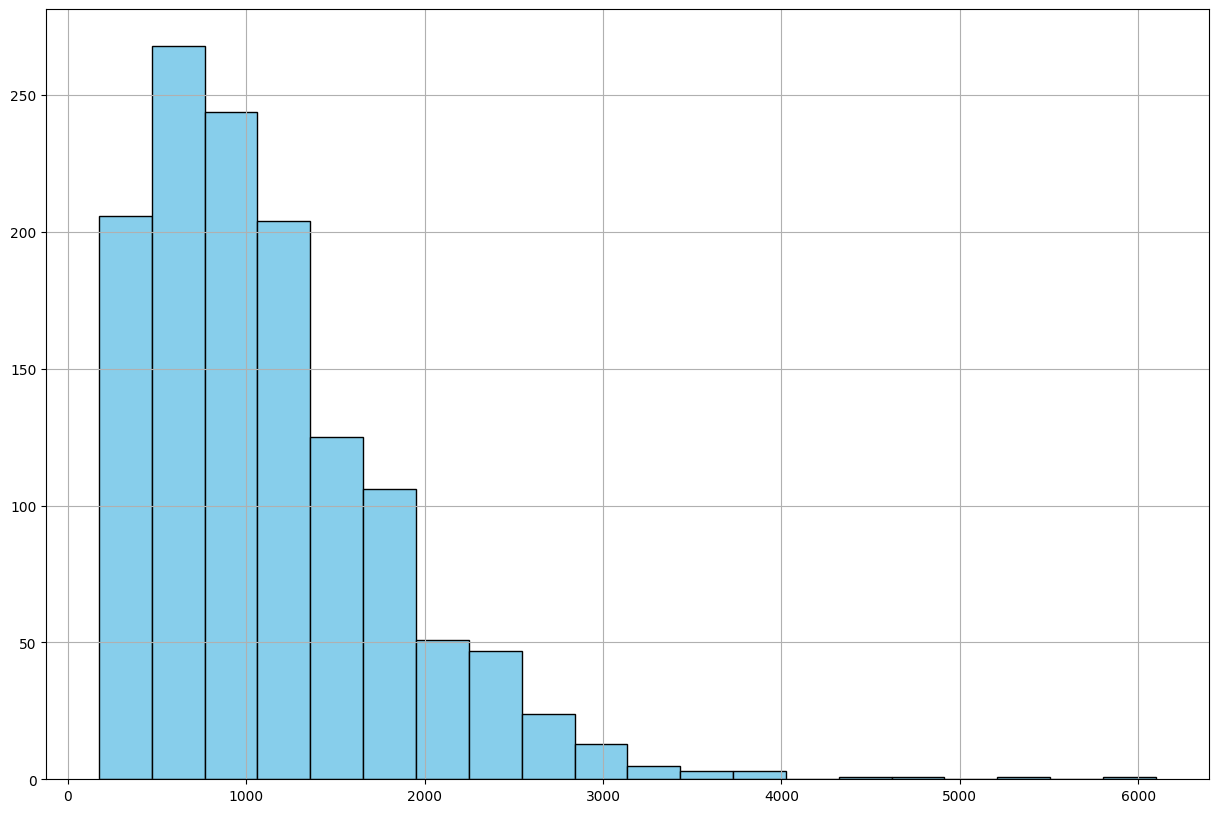

In [402]:
laptop['Price_euros'].hist(figsize=(15, 10), bins=20, color="skyblue", edgecolor="black")

<Axes: xlabel='Price_euros', ylabel='Density'>

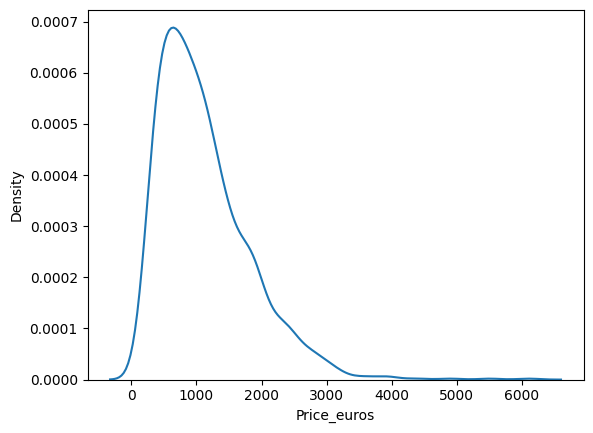

In [403]:
sns.kdeplot(laptop['Price_euros'])

<Axes: xlabel='Price_euros', ylabel='Cpu Category'>

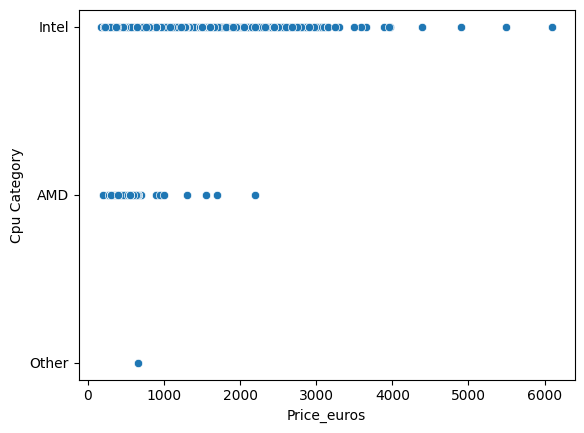

In [404]:
sns.scatterplot(x='Price_euros', y='Cpu Category', data=laptop)

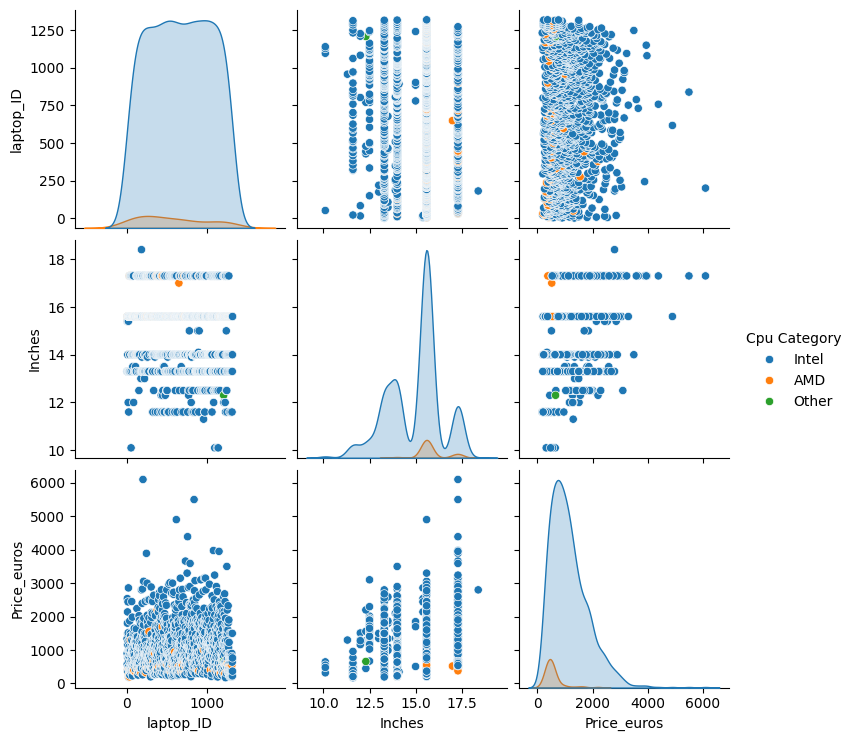

In [405]:
sns.pairplot(laptop,hue='Cpu Category')

<Axes: xlabel='Company', ylabel='Price_euros'>

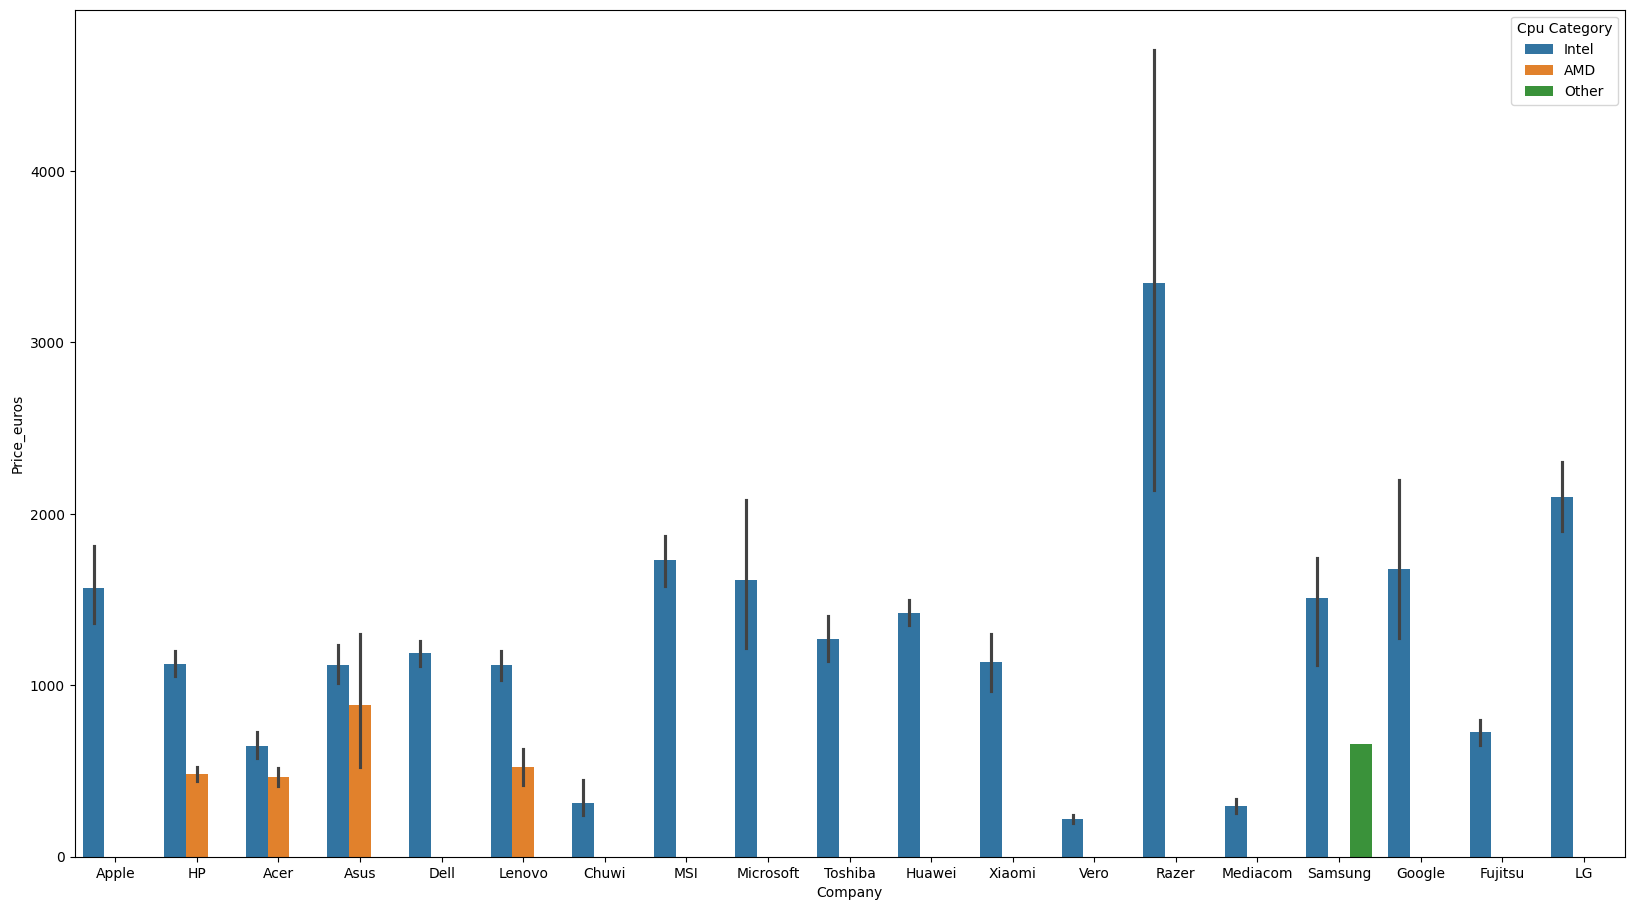

In [418]:
plt.figure(figsize=(20,11))
sns.barplot(x='Company', y='Price_euros', hue='Cpu Category', data=laptop)

<Axes: xlabel='Company', ylabel='Price_euros'>

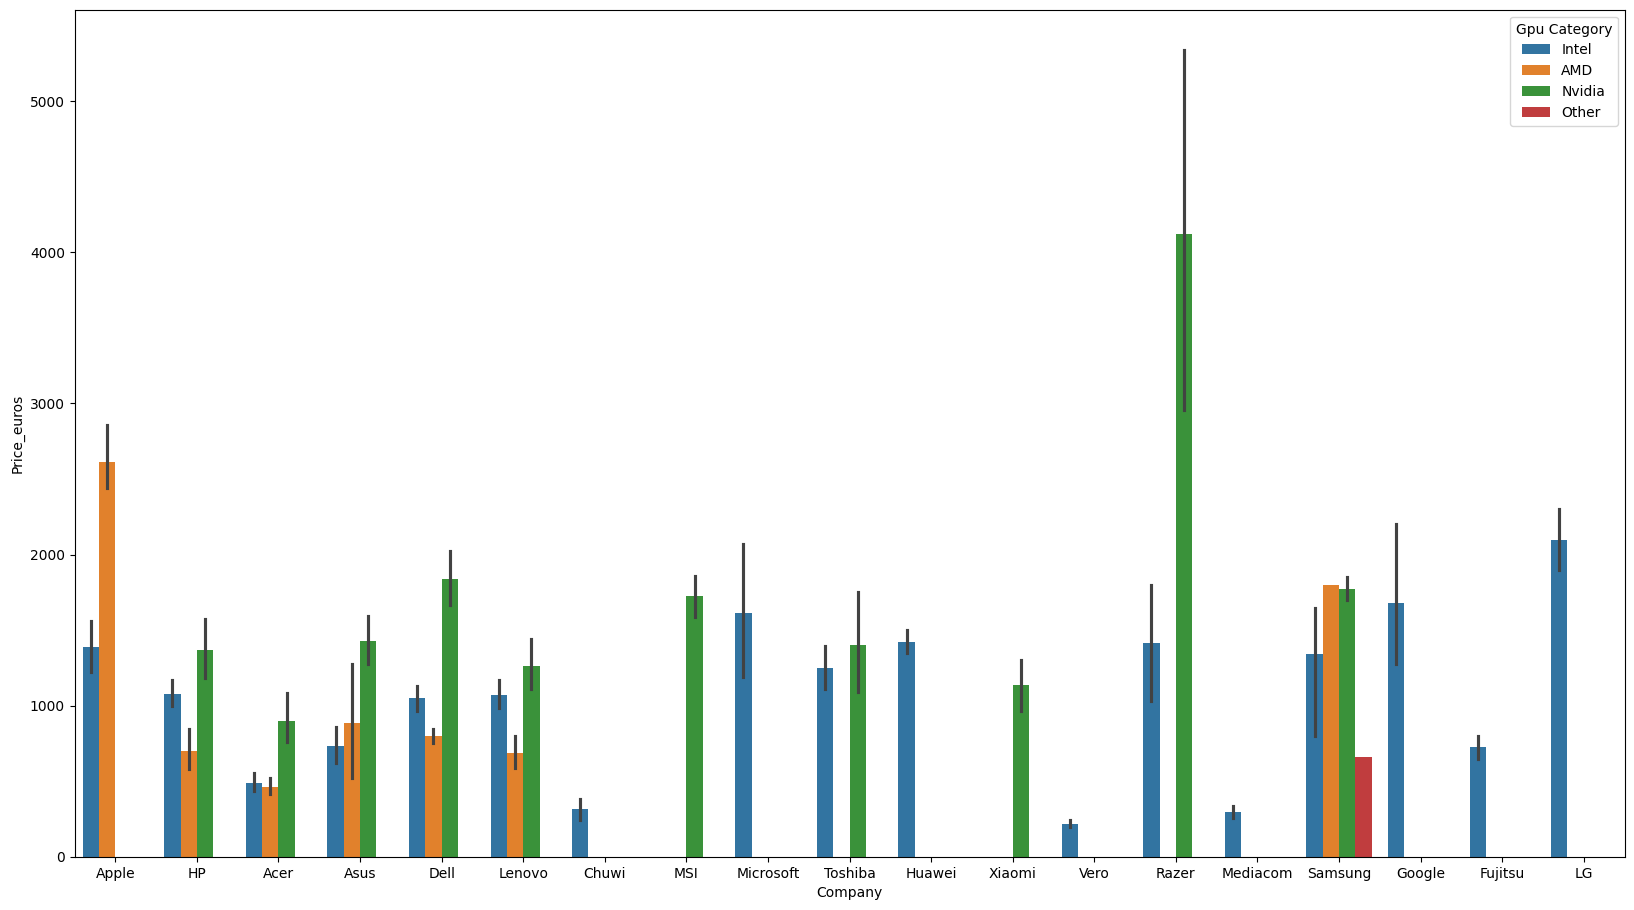

In [417]:
plt.figure(figsize=(20,11))
sns.barplot(x='Company', y='Price_euros', hue='Gpu Category', data=laptop)

([0, 1, 2], [Text(0, 0, 'Intel'), Text(1, 0, 'AMD'), Text(2, 0, 'Other')])

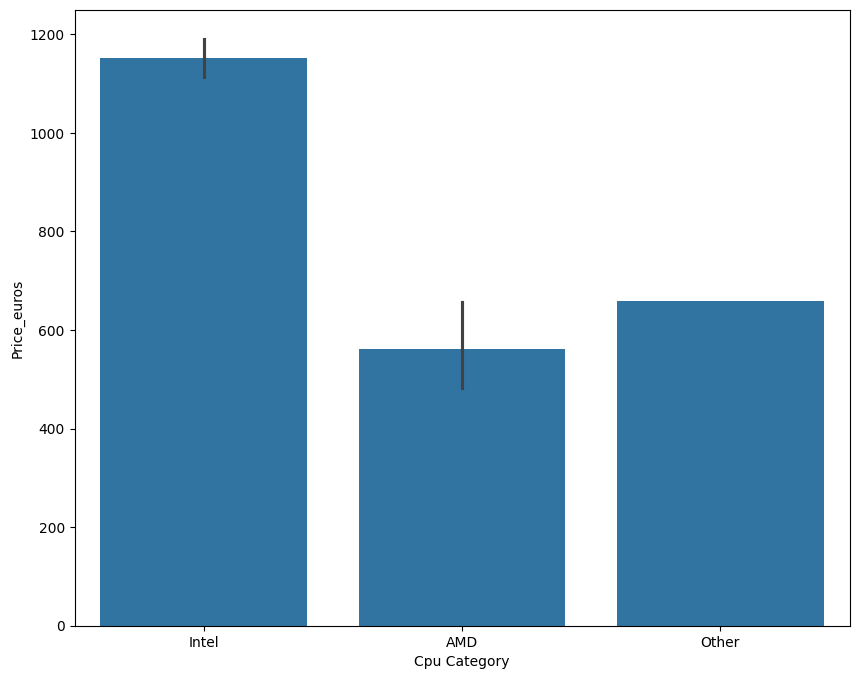

In [408]:
plt.figure(figsize=(10,8))
sns.barplot(x='Cpu Category', y='Price_euros', data=laptop)
plt.xticks(rotation=0)

([0, 1, 2, 3],
 [Text(0, 0, 'Intel'),
  Text(1, 0, 'AMD'),
  Text(2, 0, 'Nvidia'),
  Text(3, 0, 'Other')])

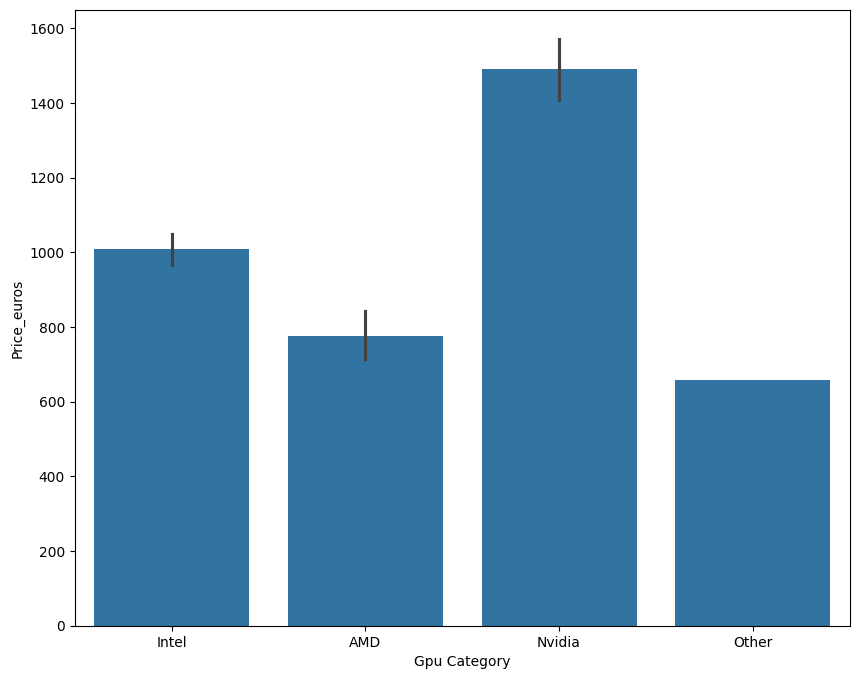

In [409]:
plt.figure(figsize=(10,8))
sns.barplot(x='Gpu Category', y='Price_euros', data=laptop)
plt.xticks(rotation=0)

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'macOS'),
  Text(1, 0, 'No OS'),
  Text(2, 0, 'Windows 10'),
  Text(3, 0, 'Mac OS X'),
  Text(4, 0, 'Linux'),
  Text(5, 0, 'Android'),
  Text(6, 0, 'Windows 10 S'),
  Text(7, 0, 'Chrome OS'),
  Text(8, 0, 'Windows 7')])

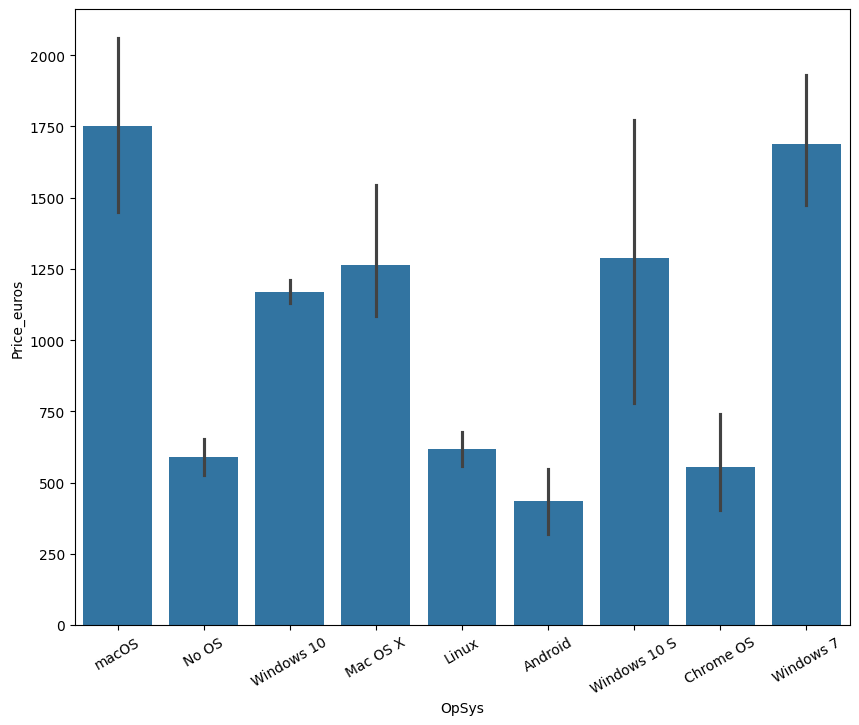

In [410]:
plt.figure(figsize=(10,8))
sns.barplot(x='OpSys', y='Price_euros', data=laptop)
plt.xticks(rotation=30)

c:\Users\Jayed Islam\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 7.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Jayed Islam\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 8.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='Company', ylabel='Price_euros'>

c:\Users\Jayed Islam\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 6.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Jayed Islam\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 7.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


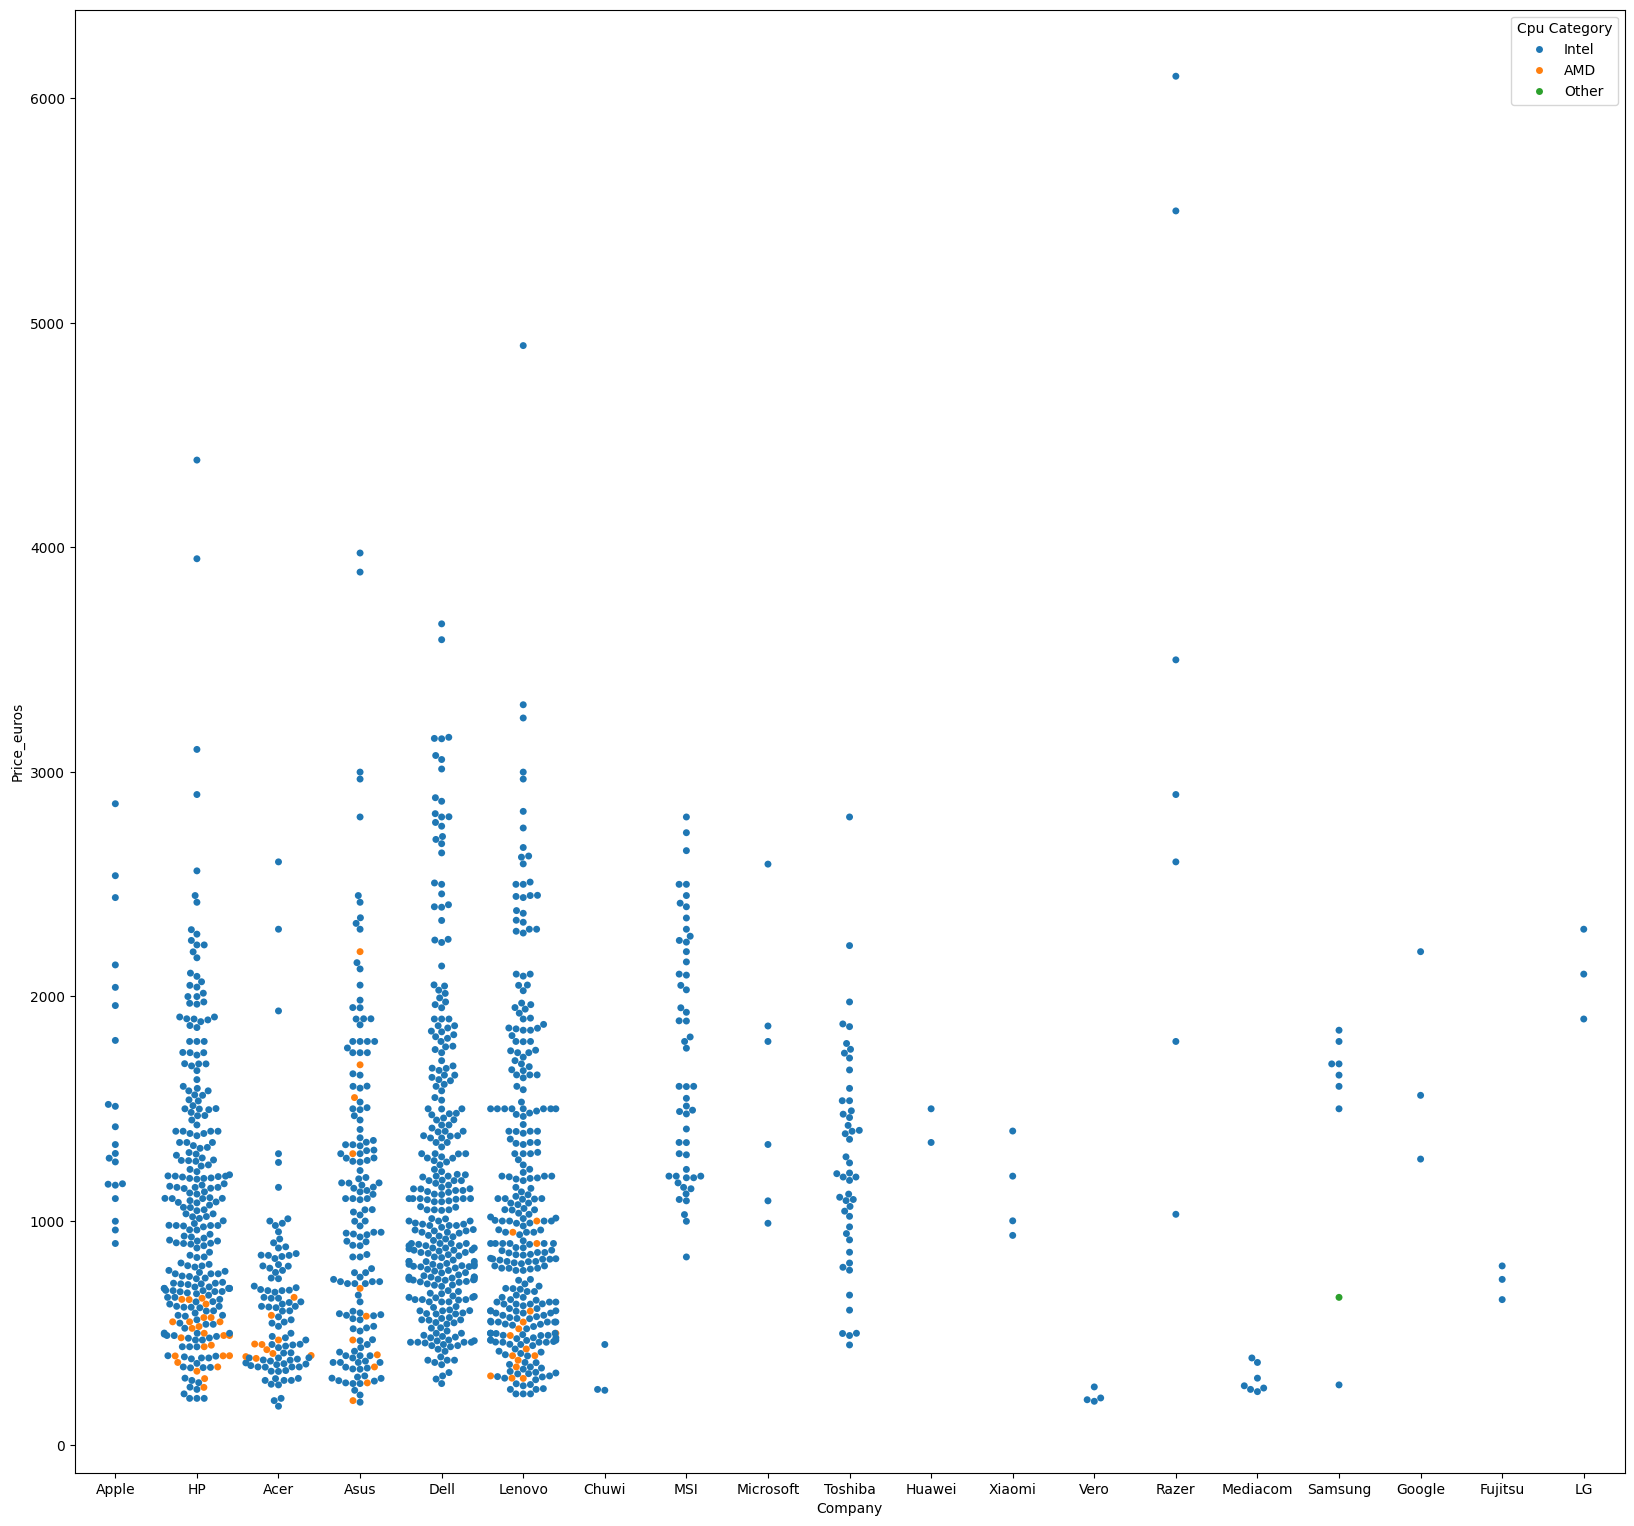

In [411]:
plt.figure(figsize=(20,19))
sns.swarmplot(x='Company', y='Price_euros', hue='Cpu Category', data=laptop)

c:\Users\Jayed Islam\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 7.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Jayed Islam\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 8.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='Company', ylabel='Price_euros'>

c:\Users\Jayed Islam\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 6.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Jayed Islam\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 7.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


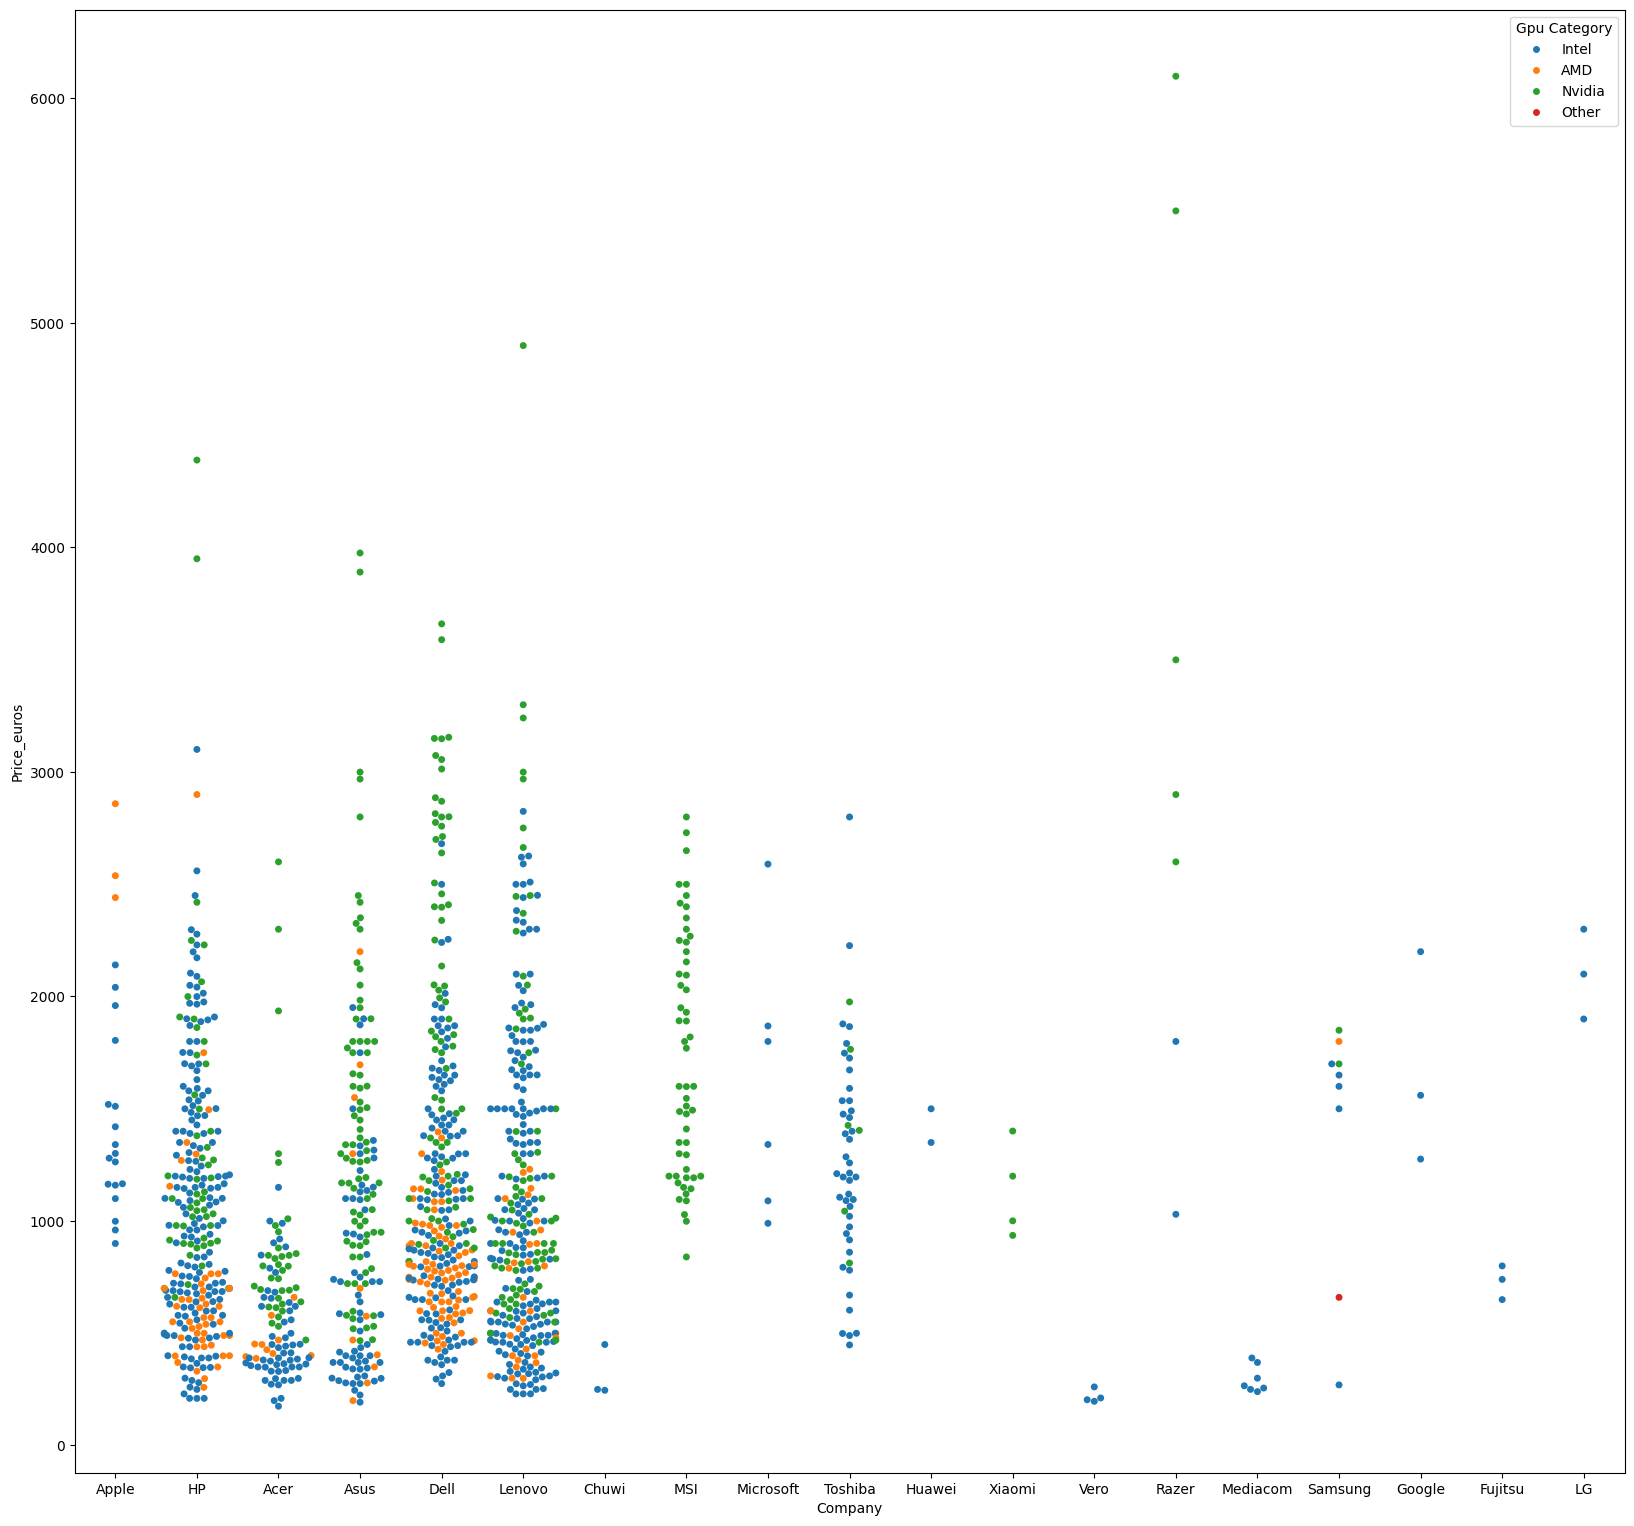

In [412]:
plt.figure(figsize=(20,19))
sns.swarmplot(x='Company', y='Price_euros', hue='Gpu Category', data=laptop)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 [Text(0, 0, 'Dell'),
  Text(1, 0, 'Lenovo'),
  Text(2, 0, 'HP'),
  Text(3, 0, 'Asus'),
  Text(4, 0, 'MSI'),
  Text(5, 0, 'Acer'),
  Text(6, 0, 'Toshiba'),
  Text(7, 0, 'Apple'),
  Text(8, 0, 'Razer'),
  Text(9, 0, 'Samsung'),
  Text(10, 0, 'Microsoft'),
  Text(11, 0, 'LG'),
  Text(12, 0, 'Google'),
  Text(13, 0, 'Xiaomi'),
  Text(14, 0, 'Huawei'),
  Text(15, 0, 'Fujitsu'),
  Text(16, 0, 'Mediacom'),
  Text(17, 0, 'Chuwi'),
  Text(18, 0, 'Vero')])

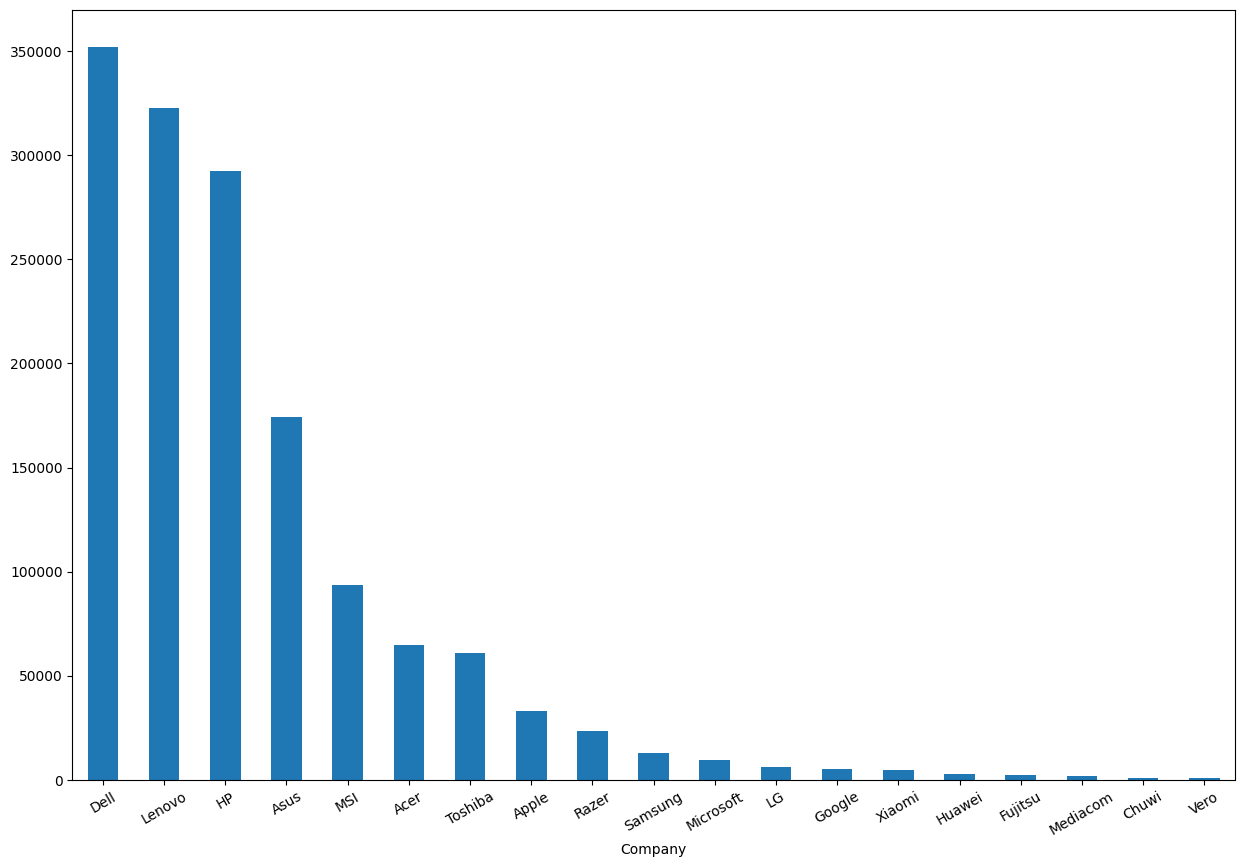

In [413]:
plt.figure(figsize=(15,10))
laptop.groupby('Company').sum()['Price_euros'].sort_values(ascending=False).plot.bar()
plt.xticks(rotation=30)

<Axes: >

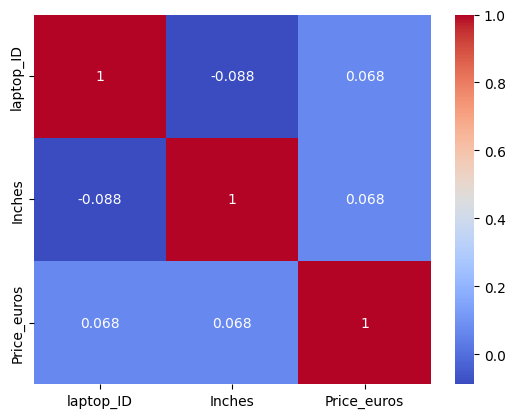

In [414]:
sns.heatmap(laptop.corr(numeric_only=True), annot=True, cmap='coolwarm')

# Done